# ALPACA credibility signal analysis

## Setup

In [1]:
from pathlib import Path
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# plot settings
plt.style.use('seaborn-whitegrid')

# load datasets
likert_datasets = ["credcoalition.csv", "microsoft.csv", "reconcile.csv"]
binary_datasets = ["fnn-gossip.csv", "fnn-politifact.csv"]

likert_per_file = (pd.read_csv(os.path.join(os.getcwd(), "datasets_evaluated", dataset), sep=";",index_col="url") 
                   for dataset in likert_datasets)
binary_per_file = (pd.read_csv(os.path.join(os.getcwd(), "datasets_evaluated", dataset), sep=";",index_col="url") 
                   for dataset in binary_datasets)

likert_df = pd.concat(likert_per_file)
binary_df = pd.concat(binary_per_file)

# swap 0 <-> 1 fake news classification to better compare with credibility ratings (higher rating = better)
binary_df["rating"] = 1 - binary_df["rating"]

print(str(likert_df.shape))
print(str(binary_df.shape))

(242, 75)
(200, 75)


## Errors

<AxesSubplot:xlabel='rating', ylabel='errors_grammar_spelling'>

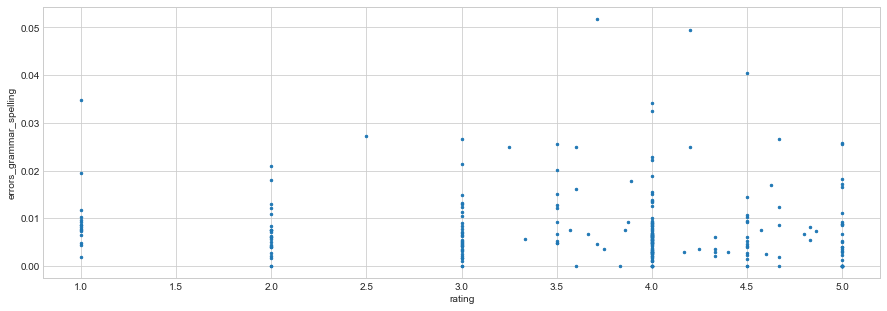

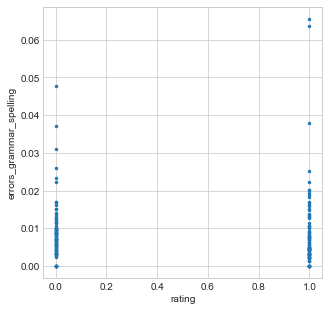

In [20]:
#############################################################
# raw scatterplots
#############################################################

likert_df.plot.scatter("rating", "errors_grammar_spelling", s=6, figsize=(15, 5))
binary_df.plot.scatter("rating", "errors_grammar_spelling", s=6, figsize=(5, 5))

Likert1 mean: 0.0100307683125 median: 0.0083762344
Likert2 mean: 0.0068821809 median: 0.006079083549999999
Likert3 mean: 0.008047554694444445 median: 0.0055672859
Likert4 mean: 0.008261432775229357 median: 0.0060422961
Likert5 mean: 0.00730465517368421 median: 0.0051369863

Fake News mean: 0.008546828574 median: 0.0072203106999999996
Real News mean: 0.008279254937 median: 0.0048322235



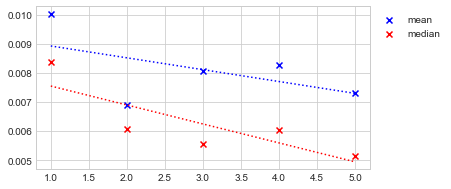

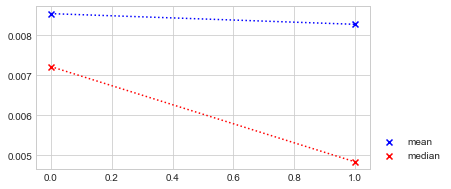

In [18]:
#############################################################
# means & medians
#############################################################

l1_mean = likert_df.query("rating < 1.5")["errors_grammar_spelling"].mean()
l2_mean = likert_df.query("1.5 <= rating < 2.5")["errors_grammar_spelling"].mean()
l3_mean = likert_df.query("2.5 <= rating < 3.5")["errors_grammar_spelling"].mean()
l4_mean = likert_df.query("3.5 <= rating < 4.5")["errors_grammar_spelling"].mean()
l5_mean = likert_df.query("4.5 <= rating")["errors_grammar_spelling"].mean()
l1_median = likert_df.query("rating < 1.5")["errors_grammar_spelling"].median()
l2_median = likert_df.query("1.5 <= rating < 2.5")["errors_grammar_spelling"].median()
l3_median = likert_df.query("2.5 <= rating < 3.5")["errors_grammar_spelling"].median()
l4_median = likert_df.query("3.5 <= rating < 4.5")["errors_grammar_spelling"].median()
l5_median = likert_df.query("4.5 <= rating")["errors_grammar_spelling"].median()

fake_mean = binary_df.query("rating == 0")["errors_grammar_spelling"].mean()
real_mean = binary_df.query("rating == 1")["errors_grammar_spelling"].mean()
fake_median = binary_df.query("rating == 0")["errors_grammar_spelling"].median()
real_median = binary_df.query("rating == 1")["errors_grammar_spelling"].median()

print("Likert1 mean: " + str(l1_mean) + " median: " + str(l1_median))
print("Likert2 mean: " + str(l2_mean) + " median: " + str(l2_median))
print("Likert3 mean: " + str(l3_mean) + " median: " + str(l3_median))
print("Likert4 mean: " + str(l4_mean) + " median: " + str(l4_median))
print("Likert5 mean: " + str(l5_mean) + " median: " + str(l5_median))
print()
print("Fake News mean: " + str(fake_mean) + " median: " + str(fake_median))
print("Real News mean: " + str(real_mean) + " median: " + str(real_median))
print()

#############################################################
# likert means & medians visualisation
#############################################################

# axes
l_x = [1, 2, 3, 4, 5]
l_y_means = [l1_mean, l2_mean, l3_mean, l4_mean, l5_mean]
l_y_medians = [l1_median, l2_median, l3_median, l4_median, l5_median]

# trendline
lz_means = np.polyfit(l_x, l_y_means, 1)
lp_means = np.poly1d(lz_means)
lz_medians = np.polyfit(l_x, l_y_medians, 1)
lp_medians = np.poly1d(lz_medians)

# plot
plt.figure(figsize=(6, 3))
plt.scatter(l_x, l_y_means, c="b", marker="x", label="mean")
plt.scatter(l_x, l_y_medians, c="r", marker="x", label="median")
plt.plot(l_x, lp_means(l_x), "b:")
plt.plot(l_x, lp_medians(l_x), "r:")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

#############################################################
# binary means & medians visualisation
#############################################################

# axes
b_x = [0, 1]
b_y_means = [fake_mean, real_mean]
b_y_medians = [fake_median, real_median]

# trendline
bz_means = np.polyfit(b_x, b_y_means, 1)
bp_means = np.poly1d(bz_means)
bz_medians = np.polyfit(b_x, b_y_medians, 1)
bp_medians = np.poly1d(bz_medians)

#plot
plt.figure(figsize=(6, 3))
plt.scatter(b_x, b_y_means, c="b", marker="x", label="mean")
plt.scatter(b_x, b_y_medians, c="r", marker="x", label="median")
plt.plot(b_x, bp_means(b_x), "b:")
plt.plot(b_x, bp_medians(b_x), "r:")
plt.legend(bbox_to_anchor=(1, 0), loc="lower left")
plt.show()

In [26]:
#############################################################
# spearman correlation
#############################################################

likert_rho, likert_p = spearmanr(likert_df["errors_grammar_spelling"], likert_df["rating"])
binary_rho, binary_p = spearmanr(binary_df["errors_grammar_spelling"], binary_df["rating"])

print("Likert rho: " + str(likert_rho) + " p: " + str(likert_p))
print("Binary rho: " + str(binary_rho) + " p: " + str(binary_p))

Likert rho: -0.1507348738431985 p: 0.018967744366367292
Binary rho: -0.13541957155632386 p: 0.0558846096089206


## Tonality: Punctuation

## Tonality: All caps

## Readability

## Language structure

## Vocabulary: Profanity

## Vocabulary: Emotions

## Outbound Links

## Sentiment: Polarity